In [ ]:
import torch
from torch.nn import BCELoss

from models import Autoencoder
from utils import *

# Load dataset

In [ ]:
training_data, testing_data = load_fashion_mnist()
labels = training_data.targets

train_loader, test_loader = create_dataloaders(training_data, testing_data, batch_size=64)

img_indices = [4206, 36981, 40796]

# Train or load Autoencoder

In [ ]:
ae = Autoencoder()
optimizer = torch.optim.Adam(ae.parameters(), lr=1e-3)
recon_loss = BCELoss()
device = get_device()

### Uncomment the lines below for custom training

In [ ]:
ae_losses, images = train_autoencoder(
    ae,
    train_loader,
    optimizer,
    recon_loss,
    epochs=100,
    image_indices=img_indices,
    device=device,
)

# Plot results

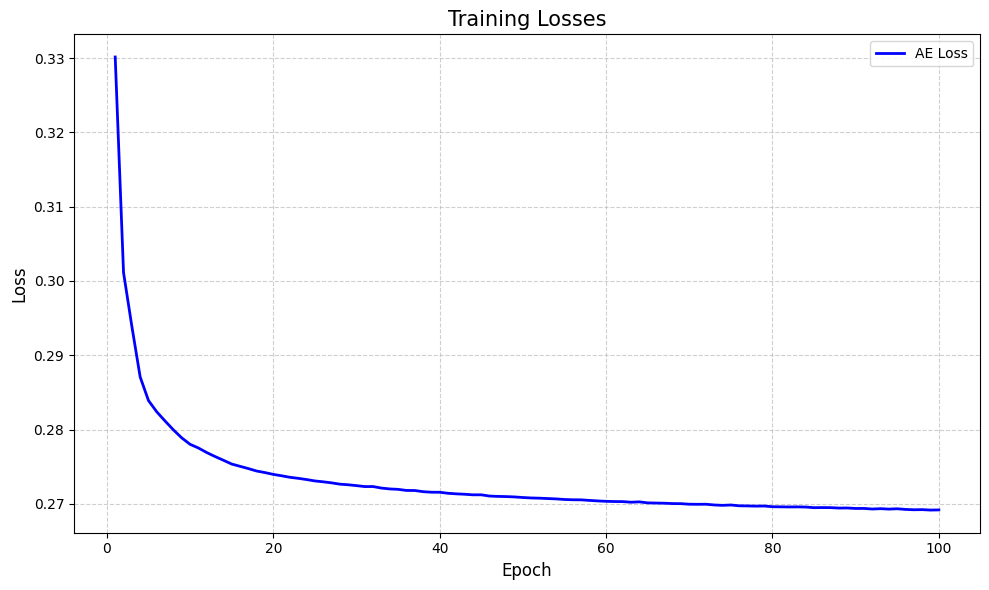

In [7]:
plot_losses(ae_losses)

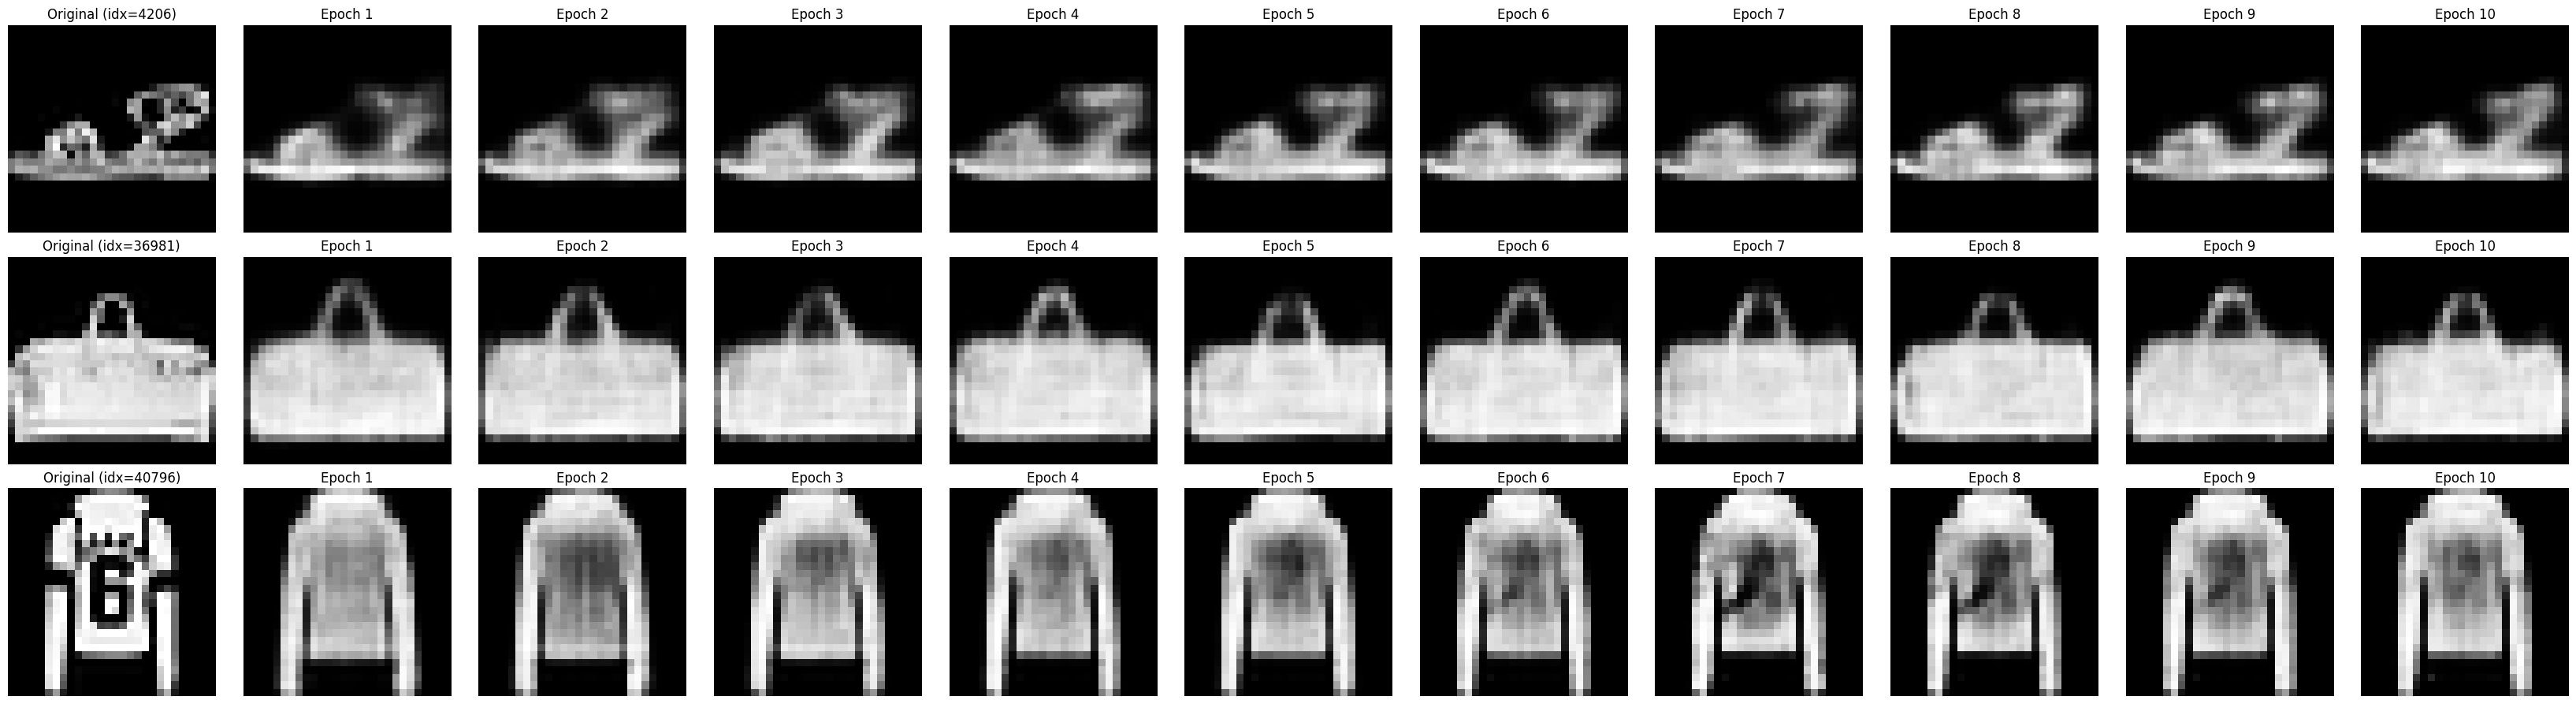

In [8]:
plot_all_reconstructions(images)

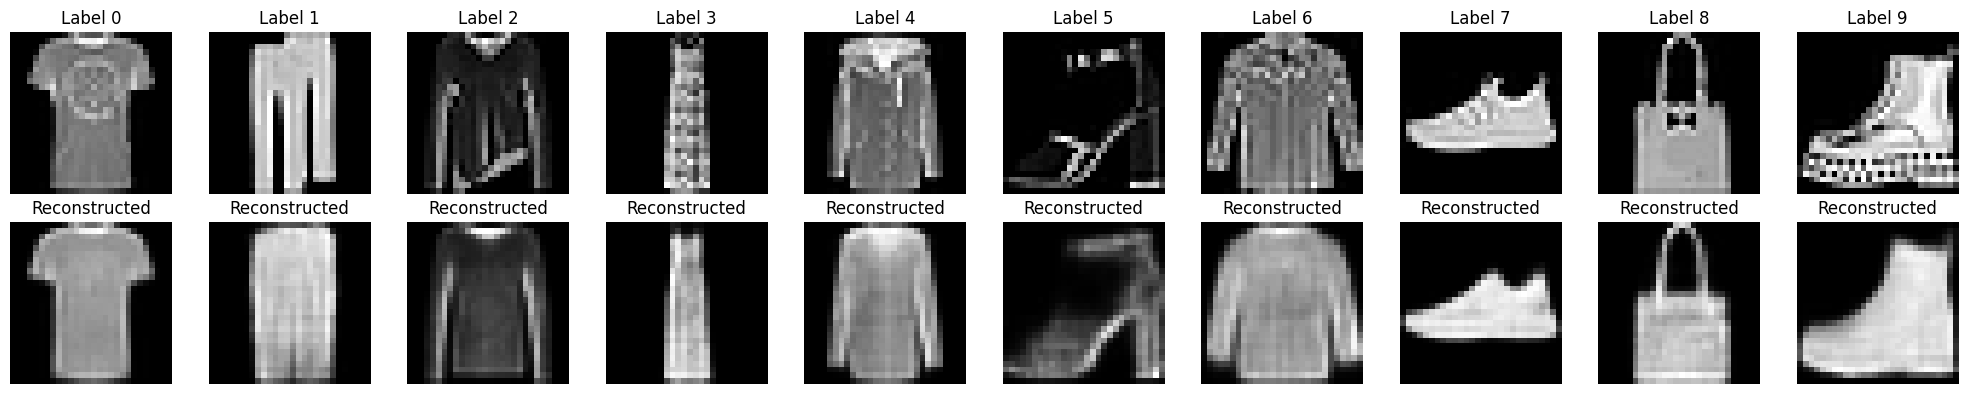

In [9]:
plot_classes_reconstruction(ae, training_data, device=device)

In [10]:
latent, predictions = get_latent_kmeans(ae, training_data, device=device)
X, _ = get_input_matrix(training_data, device=device)

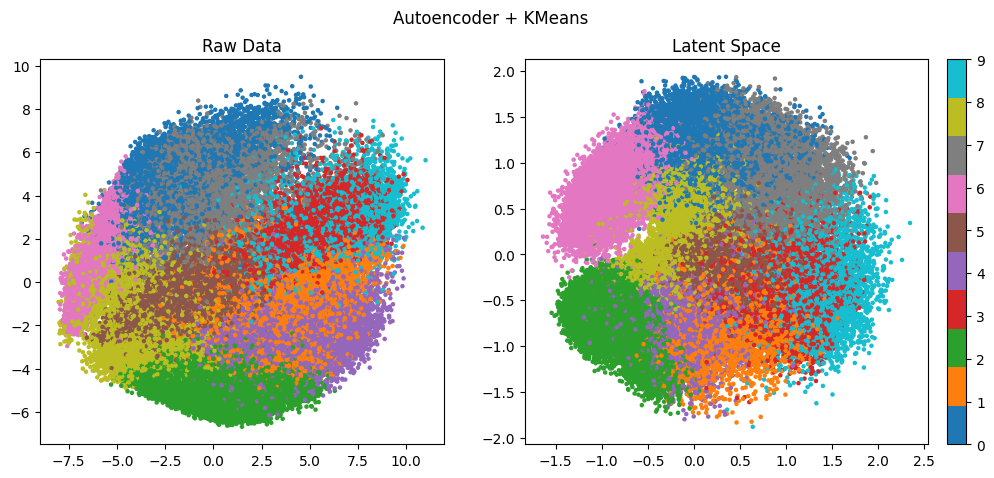

In [11]:
plot_pca(X.cpu().numpy(), latent, predictions, title="Autoencoder + KMeans")

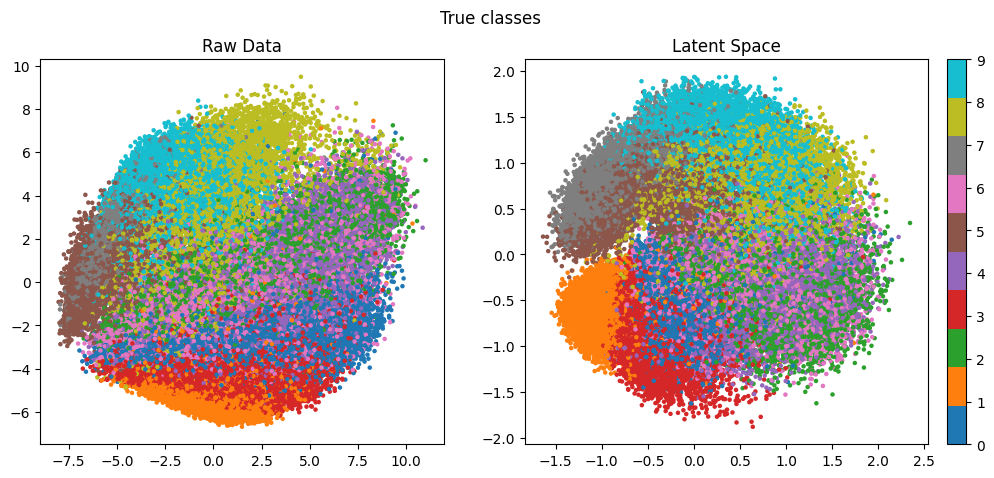

In [12]:
plot_pca(X.cpu().numpy(), latent, labels, title="True classes")